In [1]:
#yolov11 implementation
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.1/112.6 GB disk)


In [2]:
!nvidia-smi

Sun Sep 21 09:23:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Z2l31amt19k4PkfNZPJP")
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
version = project.version(14)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to rock-paper-scissors-14 in yolov11:: 100%|██████████| 14682/14682 [00:01<00:00, 8507.42it/s] 


In [5]:
#start training

In [2]:
!yolo train model =yolo11m.pt data = "/content/rock-paper-scissors-14/data.yaml" epochs = 14 imgsz=640

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/rock-paper-scissors-14/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=14, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

In [4]:
# we have our model on run-detect-train-weights-best.pt or last.pt

#validation of model


!yolo val model = "/content/runs/detect/train2/weights/best.pt" data = "/content/rock-paper-scissors-14/data.yaml"

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1676.9±568.1 MB/s, size: 41.0 KB)
val: Scanning /content/rock-paper-scissors-14/valid/labels.cache... 576 images, 238 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 576/576 10.5Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 36/36 2.3it/s 15.6s
                   all        576        400      0.902      0.881      0.927       0.72
                 Paper        132        139        0.9      0.842       0.92      0.712
                  Rock        121        141      0.885      0.926      0.926      0.721
              Scissors        116        120      0.919      0.875      0.933      0.728
Speed: 0.9ms preprocess, 23.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/runs/d

In [5]:
#inference the model after path configuration and val mode
#val dire has all the curve of metric fscore pr cure, confusion metric. confidence metric

#inferenceing with trained model
import cv2
from google.colab.patches import cv2_imshow

def show_image(image_path):
  image = cv2.imread(image_path)
  if image is None:
    print("image not found")

    return
  cv2_imshow(image)



In [7]:
#inference
!yolo predict model = "/content/runs/detect/train2/weights/best.pt" source = "/content/rock-paper-scissors-14/train/images/0001_png.rf.5e009a9ec5fbf7a8e856ba7f413996af.jpg"

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs

image 1/1 /content/rock-paper-scissors-14/train/images/0001_png.rf.5e009a9ec5fbf7a8e856ba7f413996af.jpg: 640x640 2 Rocks, 36.9ms
Speed: 2.5ms preprocess, 36.9ms inference, 108.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


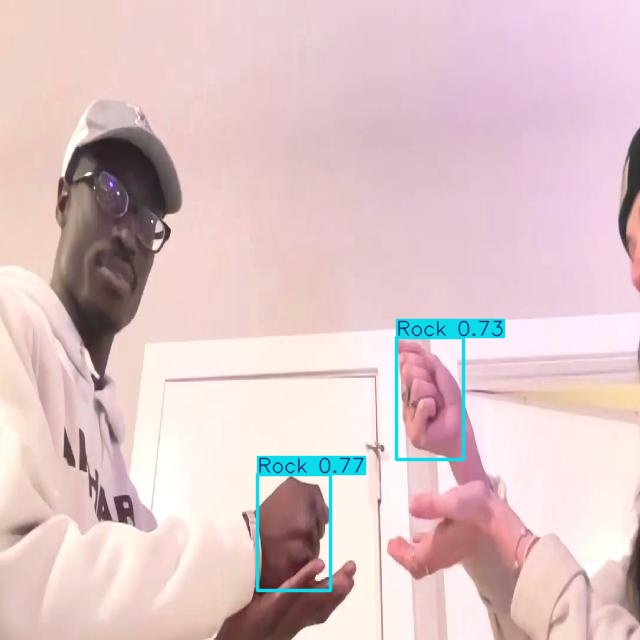

In [9]:
show_image("/content/runs/detect/predict/0001_png.rf.5e009a9ec5fbf7a8e856ba7f413996af.jpg")

In [ ]:
#export the trained model to - CPU GPU and Mobile format
#pytorch - pt default
#onnx or openVINO for  cpu
#tensorRT for gpu
!yolo export model = "/content/yolo11m.pt" format = onnx

!yolo export model = yolo11n.pt format = engine

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLO11m summary (fused): 125 layers, 20,091,712 parameters, 0 gradients, 68.0 GFLOPs

PyTorch: starting from '/content/yolo11m.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (38.8 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.67', 'onnxruntime'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 2.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.0 opset 19...
ONNX: slimming with onnxslim 0.1.69...
ONNX: export success ✅ 6.3s, saved as '/content/yolo11m.onnx' (76.9 MB)

Export complete (8.4s)
Results saved to /content
Predict:         yolo predict task=detect model=/content/yolo11m.onnx imgsz=640  
Validate: